## **06-10 소프트맥스 회귀 실습**

이 자료는 위키독스 딥 러닝을 이용한 자연어 처리 입문의 소프트맥스 회귀 튜토리얼 자료입니다.  

링크 : https://wikidocs.net/35476

이번에 실습할 데이터는 앞서 다중 클래스 분류를 설명하기 위해 예시로 들었던 붓꽃 품종 분류 문제입니다. 데이터를 직접 다운로드 받고, 데이터에 대한 탐색 과정을 거친 후 모델을 설계해보겠습니다.

데이터 다운로드 링크 : https://www.kaggle.com/saurabh00007/iriscsv

### **1. 아이리스 품종 데이터에 대한 이해**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

iris.csv 파일을 데이터프레임으로 로드한 후 5개의 샘플을 출력해보겠습니다.

In [ ]:
# urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/06.%20Machine%20Learning/dataset/Iris.csv", filename="Iris.csv")

In [2]:
data = pd.read_csv('dataset/Iris.csv') #, encoding='latin1')

In [3]:
print('샘플의 개수 :', len(data))
print(data[:5])

샘플의 개수 : 150
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


데이터는 6개의 열로 구성된 총 150개의 샘플로 구성되어져 있습니다. 각 샘플의 인덱스를 의미하는 첫번째 열인 Id는 실질적으로 의미는 없는 열입니다. 그 후 특성(feature)에 해당하는 SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm 4개의 열이 존재합니다. 마지막 열 Species는 해당 샘플이 어떤 품종인지를 의미하며 여기서 예측해야 하는 레이블에 해당됩니다. Species열에서 품종이 몇 개 존재하는지 출력합니다.

In [4]:
# 중복을 허용하지 않고, 있는 데이터의 모든 종류를 출력
print("품종 종류:", data["Species"].unique(), sep="\n")

품종 종류:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Species는 Iris-setosa, Iris-versicolor, Iris-virginica라는 3개의 품종으로 구성되어져 있습니다. 즉, 이번 데이터를 가지고 푸는 문제는 주어진 샘플 데이터의 4개의 특성으로부터 3개 중 어떤 품종인지를 예측하는 문제가 되겠습니다. 3개의 품종이 4개의 특성에 대해서 어떤 분포를 가지고 있는지 시각화해봅시다. seaborn의 pairplot은 데이터프레임을 입력으로 받아 데이터프레임의 각 열의 조합에 따라서 산점도(scatter plot)를 그립니다.

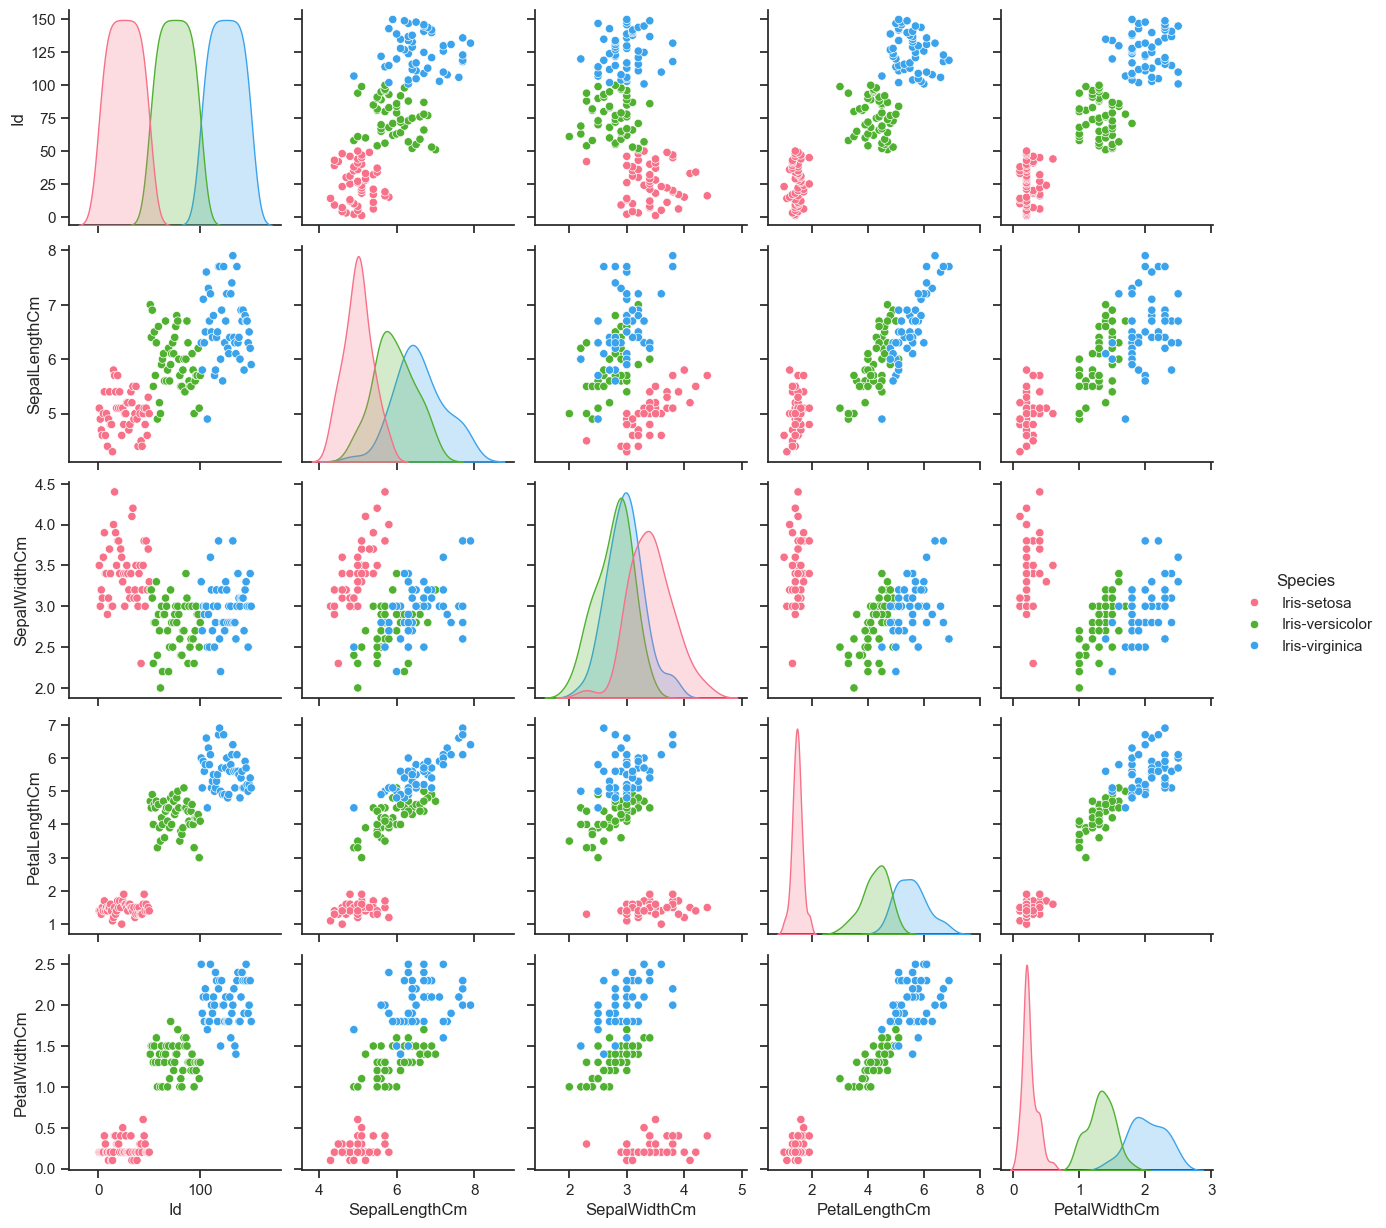

In [5]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="Species", palette="husl")

해당 입력의 경우에는 4개의 특성에 해당하는 SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm에 대해서 모든 쌍(pair)의 조합인 16개의 경우에 대해서 산점도를 그립니다. 만약 동일한 특성의 쌍일 경우에는 히스토그램으로 나타내는데 가령, SepalLengthCm와 SepalLengthCm의 조합이 그렇습니다. seaborn의 barplot을 통해 종과 특성에 대한 연관 관계를 출력할 수도 있습니다. 예를 들어 각 종에 따른 SepalWidthCm의 값을 확인해봅시다.

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

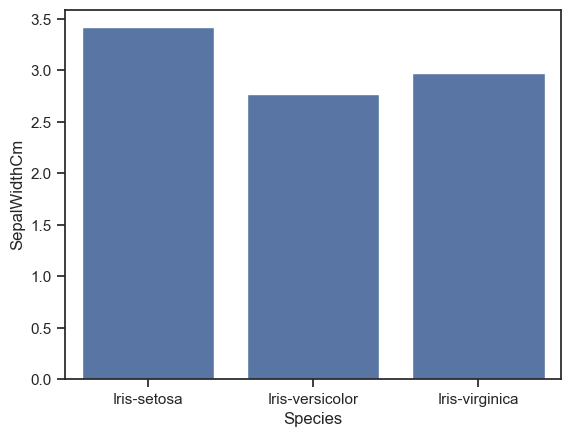

In [6]:
# 각 종과 특성에 대한 연관 관계
# sns.barplot(data['Species'], data['SepalWidthCm'], ci=None)
sns.barplot(x='Species', y='SepalWidthCm', data=data, errorbar=None)

150개의 샘플 데이터 중에서 Species열에서 각 품종이 몇 개있는지 확인합니다.

<Axes: xlabel='Species'>

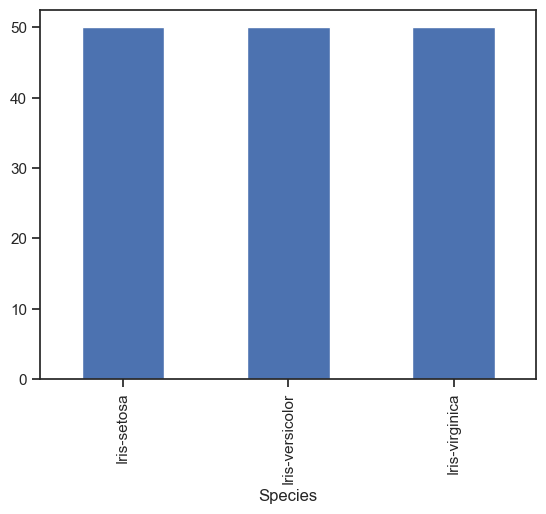

In [7]:
data['Species'].value_counts().plot(kind='bar')

동일하게 50개씩 존재합니다. 각 레이블에 대한 분포가 균일합니다. 소프트맥스 회귀 모델을 구성하기 위해 전처리를 진행해야 합니다. 레이블에 해당하는 Species열에 대해서 전부 수치화를 진행해봅시다. 우선 원-핫 인코딩을 수행하기 전 정수 인코딩을 수행합니다. 정상적으로 정수 인코딩이 수행되었는지 확인하기 위하여 다시 한 번 값의 분포를 출력합니다.

C:\Users\dlwlg\AppData\Local\Temp\ipykernel_24304\1289145144.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Species'] = data['Species'].replace(['Iris-virginica','Iris-setosa','Iris-versicolor'],[0,1,2])


<Axes: xlabel='Species'>

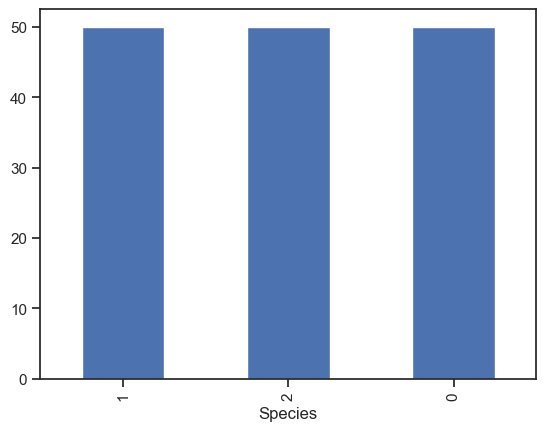

In [8]:
# Iris-virginica는 0, Iris-setosa는 1, Iris-versicolor는 2가 됨.
data['Species'] = data['Species'].replace(['Iris-virginica','Iris-setosa','Iris-versicolor'],[0,1,2])
data['Species'].value_counts().plot(kind='bar')

여전히 동일한 분포를 보입니다. 특성과 품종을 각각 종속 변수와 독립 변수 데이터로 분리하는 작업을 수행하고, 정확하게 분리가 되었는지 확인하기 위해 데이터 중 상위 5개씩 출력해보겠습니다.

In [9]:
data_X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
data_y = data['Species'].values

print(data_X[:5])
print(data_y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1]


훈련 데이터와 테스트 데이터를 분리하고 레이블에 대한 원-핫 인코딩을 수행해합니다. 그리고 원-핫 인코딩이 진행되었는지 확인하기 위해 훈련 데이터의 레이블과 테스트 데이터의 레이블을 상위 5개씩 출력합니다.

In [10]:
# 훈련 데이터와 테스트 데이터를 8:2로 나눕니다. 또한 데이터의 순서를 섞습니다.
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)

# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


---
### **2. 소프트맥스 회귀**

입력의 차원이 4이므로 input_dim의 인자값이 4로 변경되었습니다. 출력의 차원이 3이므로 input_dim=4 앞의 인자값이 3입니다. 또한 활성화 함수로는 소프트맥스 함수를 사용하므로 activation의 인자값으로 'softmax'를 사용합니다.

오차 함수로는 크로스 엔트로피 함수를 사용합니다. 시그모이드 함수를 사용한 이진 분류 문제에서는 binary_crossentropy를 사용하였지만, 다중 클래스 분류 문제에서는 'categorical_crossentropy를 사용합니다. 옵티마이저로는 경사 하강법의 일종인 아담(adam)을 사용해보았습니다. 아담에 대한 설명은 딥 러닝 챕터에서 다룹니다.

전체 데이터에 대한 훈련 횟수는 200입니다. 이번에는 테스트 데이터를 별도로 분리해서 평가에 사용하였는데, validation_data=()에 테스트 데이터를 기재해주면 실제로는 훈련에는 사용하지 않으면서 각 훈련 횟수마다 테스트 데이터에 대한 정확도를 출력합니다. 즉, 정확도가 전체 데이터에 대한 훈련 1회(1 에포크)마다 측정되고는 있지만 기계는 해당 데이터를 가지고 가중치를 업데이트하지 않습니다.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [12]:
model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# 옵티마이저는 경사하강법의 일종인 adam을 사용합니다.
# 손실 함수(Loss function)는 크로스 엔트로피 함수를 사용합니다.
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 200번 시도합니다.
history = model.fit(X_train, y_train, epochs=200, batch_size=1, validation_data=(X_test, y_test))

Epoch 1/200


c:\Users\dlwlg\anaconda3\envs\py310_yolo\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3480 - loss: 2.8035 - val_accuracy: 0.2000 - val_loss: 2.5110
Epoch 2/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4485 - loss: 1.6066 - val_accuracy: 0.2000 - val_loss: 1.7367
Epoch 3/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3618 - loss: 1.5124 - val_accuracy: 0.2000 - val_loss: 1.3490
Epoch 4/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4066 - loss: 1.1819 - val_accuracy: 0.2000 - val_loss: 1.1926
Epoch 5/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3527 - loss: 1.0848 - val_accuracy: 0.2000 - val_loss: 1.0928
Epoch 6/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3181 - loss: 1.0668 - val_accuracy: 0.2333 - val_loss: 1.0390
Epoch 7/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4688 - loss: 0.9435 - val_accuracy: 0.3333 - val_loss: 0.9712
Epoch 8/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5623 - loss: 0.9845 - val_accuracy: 0.5667

출력에서 accuracy은 훈련 데이터에 대한 정확도이고, val_accuracy은 테스트 데이터에 대한 정확도를 의미합니다. 이번에는 각 에포크당 훈련 데이터와 테스트 데이터에 대한 정확도를 측정했으므로 한 번 에포크에 따른 정확도를 그래프로 출력해보겠습니다.

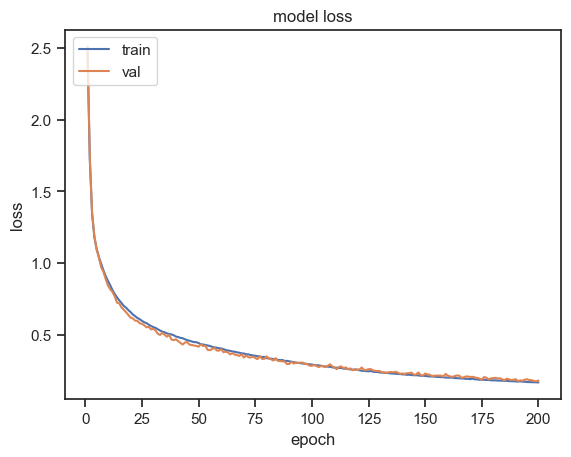

In [13]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

에포크가 증가함에 따라 오차(loss)가 점차적으로 줄어드는 것을 볼 수 있습니다. 케라스에서 테스트 데이터의 정확도를 측정하는 용도로 제공하고 있는 evaluate()를 통해 테스트 데이터에 대한 정확도를 다시 출력해보겠습니다.

In [14]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 1.0000 - loss: 0.1808

 테스트 정확도: 1.0000


테스트 데이터에 대해서 96.67%의 정확도를 얻었습니다.

마지막 편집일시 : 2023년 8월 19일 11:43 오후